## The Vizzards

Team members: Erik Blomsterberg, Varun Ghat Ravikumar, Tamanna Surendar Kumavat, and Jorge Ortiz

Github repository: https://github.com/ErikBlomsterberg/IVDA

Contributions of each team member:
* Erik : Backend setup, selection and training of ML models
* Varun : Frontend visualization, map visualization according labelling
* Tamanna : Frontend setup,Front End and Back End Integration, initial labelling.
* Jorge : Data preprocessing, model selection and training.

Toolkint:
* Backend: Flask
* Frontend: Vue
* Datapreprocessing : Pandas
* Machine Learning : Scikit-learn

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table

In [222]:
# Original dataset provided as excel file

dataset = pd.read_excel('Data/original_dataset.xlsx')
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.37374,8.51957,Entire home/apt,100,1125,49,2019-04-27,0.39,1,358,0,NaN
1,86645,Stadium Letzigrund - by Airhome,475053,James,Kreis 3,Sihlfeld,47.38038,8.50461,Entire home/apt,184,1,50,2021-07-16,0.36,17,0,0,NaN
2,143821,marvelous LOFT in SIHLCITY ZÃ¼rich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.35724,8.52304,Entire home/apt,200,3,0,NaT,NaN,1,145,0,NaN
3,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.36565,8.52753,Private room,60,5,9,2016-05-10,0.07,1,221,0,NaN
4,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,HÃ¶ngg,47.40656,8.48465,Private room,200,3,0,NaT,NaN,1,364,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,52950237,"Modern 2.5 rooms ap. 9th floor, beautiful view",428670062,Edit,Kreis 12,Hirzenbach,47.40449,8.60407,Entire home/apt,156,6,5,2022-09-16,0.46,1,1,5,NaN
2242,572195881887326016,Modern 4.5 Rooms Business Apartment @ Glattbrugg,151693991,Sinhaâ€˜S Swiss,Kreis 11,Seebach,47.43264,8.56294,Entire home/apt,350,3,10,2022-08-17,1.69,18,0,10,NaN
2243,46078634,"3 modern and newly renovated rooms, smart travel",373463545,Lukas,Kreis 11,Seebach,47.45194,8.53714,Private room,285,1,19,2021-11-26,0.83,10,0,2,NaN
2244,46479980,Hotel Rooms - long stay - Home away from Home,373463545,Lukas,Kreis 11,Seebach,47.45158,8.53776,Private room,105,9,13,2022-04-30,0.65,10,0,6,NaN


### Data characterization

The given data set is very diverse since different kind of data can be found. According to Munzner's VAD Chapter 2, Nominal/Categorical data are present as id, name, host_id, host name, room type, and neighborhood is present.  Quantitative data is also present as the price, minimum nights, number of reviews, last review date, reviews per month, availability, and number of reviews in the last month.

Furhtermore, distribution of values is analyzed for the features that are considered most relevant for an user to make a decision wether or not they like the appartment.
* Latitude and longitude : Quantitative values that describe where the apartment is located.
* Price: Quantitative float value describing the cost of the appartment. Te values range from 0 to 9840.
* Room type: Categorical value that describes the type of housing. Possible values are Entire house, private room, shared room, and hotel room.

Data analytics was made using the pandas framework. Information about the descriptive statistics and data processing can be found in the next sections

### Goals

1. Display information in a consistent way, so that the user can be aware of the characteristics of the appartment before labelling and deciding if he/she like it or not. Additional preprocessing required: Remove inconsistent information, as outliers or housing options that are not available. See Data Preprocessing section.

2. Visualization of the location of the appartments: The user can see on the map where the appartment is located. Additional preprocessing required: None, since this can be done using the latitude and longitude, which is already provided in the correct format.

3. Labelling: The user can label on a 5-star-basis if he/she likes the housing option. Additional preprocessing required: None since the information is provided by the user.

4. Prediction: A ML learning model can predict if the user would like or not a given option. Additional preprocessing required: Remove irrelevant information that isn't relevant for the decision making and numerical encoding of relevant no-numerical features. See data Preprocessing and Data Preparation for Regression Model sections.

### Data Preprocessing

In [223]:
# Count duplicates - Whole rows

# No duplicates were found, therefore we don't remove any row
dataset.groupby(dataset.columns.tolist(),as_index=False).size()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,size


In [224]:
# Check if any ID is duplicated. ID's are supposed to be unique.

# As it is possible to see, the number of rows is the same, so there are no duplicate IDs
dataset.drop_duplicates(subset='id', keep='first', inplace=True)
print(dataset.shape) #Shape is preserved

(2246, 18)


In [225]:
# Now it is possible to assign our row index to the ID column.

dataset = (dataset.set_index('id'))

In [226]:
# Count missing values
dataset_nans = dataset.copy()
for col in dataset_nans.columns:
    dataset_nans[col].replace('', np.nan, inplace=True)
    dataset_nans[col].replace(0, np.nan, inplace=True)
    dataset_nans[col].replace(float(0), np.nan, inplace=True)
dataset_nans.isna().sum()

name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                1
minimum_nights                       0
number_of_reviews                  445
last_review                        445
reviews_per_month                  445
calculated_host_listings_count       0
availability_365                   474
number_of_reviews_ltm              844
license                           2246
dtype: int64

In [227]:
# Get summary statistics

dataset.drop("host_id", axis=1).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,1801,1801.000000,2246.000000,2246.000000,2246.000000,0.0
mean,47.379313,8.534556,186.762244,12.136687,29.375779,2021-12-25 15:49:04.364241920,1.229384,9.487979,150.410062,8.377115,NaN
min,47.304080,8.442150,0.000000,1.000000,0.000000,2014-11-01 00:00:00,0.010000,1.000000,0.000000,0.000000,NaN
25%,47.365150,8.518722,83.000000,1.000000,1.000000,2021-11-26 00:00:00,0.200000,1.000000,7.000000,0.000000,NaN
50%,47.376820,8.532615,120.000000,3.000000,6.000000,2022-08-01 00:00:00,0.570000,1.000000,113.000000,2.000000,NaN
75%,47.392917,8.550437,199.000000,7.000000,24.000000,2022-09-05 00:00:00,1.510000,8.000000,294.000000,8.000000,NaN
max,47.452330,8.644700,9840.000000,1125.000000,903.000000,2022-09-22 00:00:00,12.630000,91.000000,365.000000,224.000000,NaN
std,0.023104,0.028604,287.972166,65.123043,65.484594,NaN,1.650677,19.182550,137.109183,16.995867,NaN


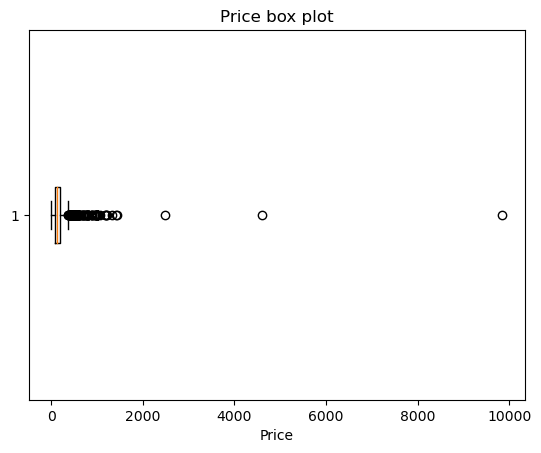

In [228]:
# Outliers visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Price 
plt.boxplot(x=dataset['price'], vert=False)
plt.title('Price box plot')
plt.xlabel('Price')
plt.show()

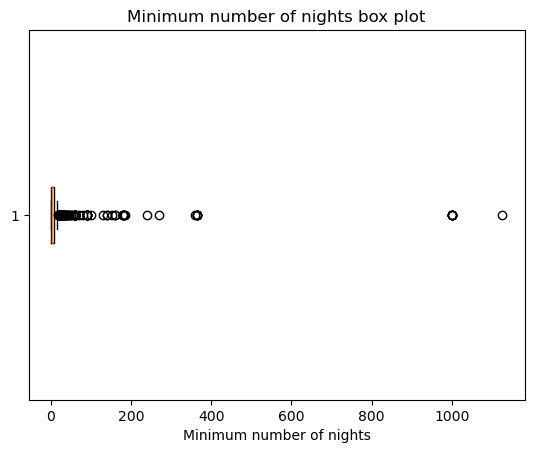

In [229]:
# Min number of nights 
plt.boxplot(x=dataset['minimum_nights'], vert=False)
plt.title('Minimum number of nights box plot')
plt.xlabel('Minimum number of nights')
plt.show()

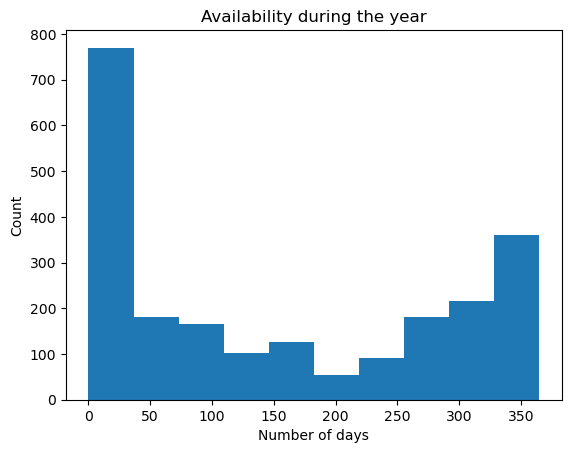

In [230]:
# We decided to use the histogram plot to identify invalid values in the year availability

counts, bins = np.histogram(dataset['availability_365'])
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Availability during the year')
plt.xlabel('Number of days')
plt.ylabel('Count')
plt.show()

In [231]:
# Based on the NaNs count and the summary statistics we can take further actions

# 1. Remove outliers.
# Since this is a renting website, having a price of 0 is not allowed, therefore we remove this row as it is probably an error
dataset['price'].replace(0, np.nan, inplace=True)
dataset.dropna(subset=['price'], inplace=True)
# The mean of the min of nights is 12, but we have a value of 1125, which is definitely an outlier and probably an error.
# In general we decided that it is ilogical to ask for a minimum number of nights greater than a year in a short term accomodation website
dataset = dataset.drop(dataset[dataset.minimum_nights > 365].index)

# 2. Remove rows not satisfying some availability constraints.
# The max value of availability_365 shoud be 365, therefore we remove elements with higher value.
dataset = dataset.drop(dataset[dataset.availability_365 > 365].index)
# As well we would not like to display rooms that doesn't have availability, therefore we remove them.
dataset = dataset.drop(dataset[dataset.availability_365 == 0].index)

# 3. We got an empty column (license), this information is not relevant so we drop it.
dataset.drop('license', axis=1, inplace=True)

# 4. There are several NaNs present in the reviews, however it is normal that some users don't submit reviews and this doesn't affect the functionality
# of the model/website, as a matter of fact we can know for this that there is a huge lack of feedback from the user and this is one of the main problems
# we would like to solve. Therefore no action was taken.

print(dataset.shape)

(1766, 16)


In [232]:
# Print again model statistics to be sure everything is in order

dataset.drop("host_id", axis=1).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1404,1404.000000,1766.000000,1766.000000,1766.000000
mean,47.378822,8.535322,200.874292,9.185164,29.129105,2022-02-07 23:38:27.692307712,1.316474,10.587203,190.350510,9.185730
min,47.304080,8.442150,23.000000,1.000000,0.000000,2014-11-01 00:00:00,0.010000,1.000000,1.000000,0.000000
25%,47.364920,8.518203,88.000000,1.000000,1.000000,2022-04-29 18:00:00,0.230000,1.000000,64.000000,0.000000
50%,47.376440,8.533405,129.000000,3.000000,6.000000,2022-08-14 00:00:00,0.670000,2.000000,197.000000,2.000000
75%,47.392342,8.552000,206.000000,7.000000,25.000000,2022-09-09 00:00:00,1.645000,9.000000,317.000000,10.000000
max,47.451560,8.644700,9840.000000,365.000000,903.000000,2022-09-22 00:00:00,12.630000,91.000000,365.000000,224.000000
std,0.023054,0.030124,318.024875,27.666820,66.189498,NaN,1.712263,20.497524,127.141954,17.890208


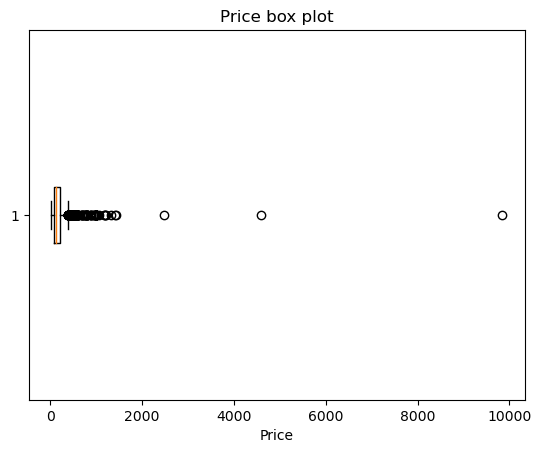

In [233]:
# Visualizations after preprocessing

# Price 
plt.boxplot(x=dataset['price'], vert=False)
plt.title('Price box plot')
plt.xlabel('Price')
plt.show()

As it is possible to see, the visualization looks pretty much the same. This is because there was only one sample with price 0, which was the removed visualization. It is true that there are outliers in the upper limit (tending to 10k CHF). However we do not have an upper bound restriction and we believe in offer-demand laws. The people offering housing are free to decide whichever cost is fair for them. It will depend on the potential client to rent or not the room for the given price.

This is an example of why statistics is the main tool for data preprocessing. For sure visualization allow us to identify patterns faster and therefore take decisions on data preprocessing, but statistics contain detailed information on the available data. Combining these two methologies is very important for Data Scientists.

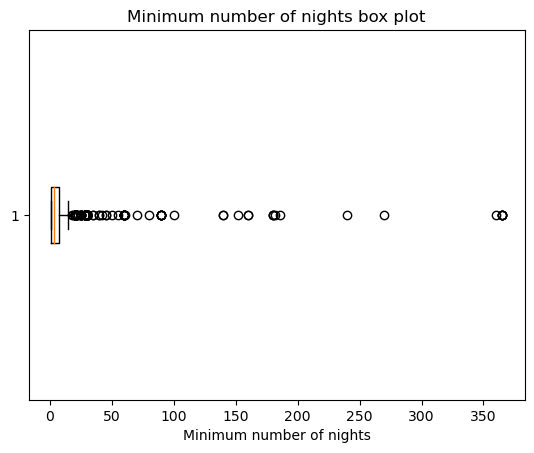

In [234]:
# Min number of nights 
plt.boxplot(x=dataset['minimum_nights'], vert=False)
plt.title('Minimum number of nights box plot')
plt.xlabel('Minimum number of nights')
plt.show()

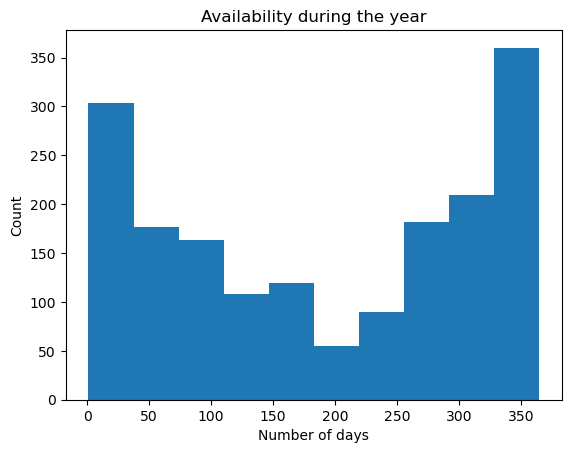

In [235]:
counts, bins = np.histogram(dataset['availability_365'])
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Availability during the year')
plt.xlabel('Number of days')
plt.ylabel('Count')
plt.show()

As it is possible to observe in the visualizations of the minimum amount of nights and the availability during the years the goals were fulfilled.
* The box plot of the minimum amount of nights, show that the outliers were removed. Now the maximum value is 365.
* The histograms regarding the year availability show that all the not valid values of availability_365 were removed. Zero values were removed since we don't want to display unavailable housing options and values bigger than 365 were removed since there is a 365 upper bound.

In [236]:
dataset.to_csv('Data/preprocessed.csv')

In [237]:
# import plotly.figure_factory as ff

# fig =  ff.create_table(dataset.drop("host_id", axis=1).describe().round(decimals=2).reset_index())
# fig.update_layout(
#     autosize=True,
#     #width=2000,
#     #height=200,
# )
# fig.write_image("table_plotly.png", scale=2)
# fig.show()

# Import data to latex -> Relevant for G1 delivery
dataset.drop("host_id", axis=1).describe().round(decimals=2).reset_index().to_latex()

'\\begin{tabular}{llrrrrrlrrrr}\n\\toprule\n & index & latitude & longitude & price & minimum_nights & number_of_reviews & last_review & reviews_per_month & calculated_host_listings_count & availability_365 & number_of_reviews_ltm \\\\\n\\midrule\n0 & count & 1766.000000 & 1766.000000 & 1766.000000 & 1766.000000 & 1766.000000 & 1404 & 1404.000000 & 1766.000000 & 1766.000000 & 1766.000000 \\\\\n1 & mean & 47.380000 & 8.540000 & 200.870000 & 9.190000 & 29.130000 & 2022-02-07 23:38:27.692307712 & 1.320000 & 10.590000 & 190.350000 & 9.190000 \\\\\n2 & min & 47.300000 & 8.440000 & 23.000000 & 1.000000 & 0.000000 & 2014-11-01 00:00:00 & 0.010000 & 1.000000 & 1.000000 & 0.000000 \\\\\n3 & 25% & 47.360000 & 8.520000 & 88.000000 & 1.000000 & 1.000000 & 2022-04-29 18:00:00 & 0.230000 & 1.000000 & 64.000000 & 0.000000 \\\\\n4 & 50% & 47.380000 & 8.530000 & 129.000000 & 3.000000 & 6.000000 & 2022-08-14 00:00:00 & 0.670000 & 2.000000 & 197.000000 & 2.000000 \\\\\n5 & 75% & 47.390000 & 8.550000 & 20

### Data preparation for regression model

We decided for the ML model, that some features are more important that others to generate a prediction. For instance, when someone is looking for an appartment the following attributes are considered:
1. Location
2. Type of housing
3. Price

For measuring the location, we decided to use the longitude and latitude feature since they are numeric and reveal the exact position of the house. The neighbourhood feature could also be used, but it doesn't reveal the exact location as long and lat. The price is also given, so we do not apply any data transformation to this columns.

For the type of housing we apply a numeric transformation to simplify complexity of the data. Since we have multiple categories, we apply one hot encoding to avoid false predictions since this labels don't have any inherent order among categories.

In [238]:
df = pd.read_csv('Data/preprocessed.csv', index_col='id')

In [239]:
df = pd.get_dummies(df, columns=['room_type'], prefix='')
df['_Entire home/apt'].replace(True, 1, inplace=True)
df['_Entire home/apt'].replace(False, 0, inplace=True)
df['_Hotel room'].replace(True, 1, inplace=True)
df['_Hotel room'].replace(False, 0, inplace=True)
df['_Private room'].replace(True, 1, inplace=True)
df['_Private room'].replace(False, 0, inplace=True)
df['_Shared room'].replace(True, 1, inplace=True)
df['_Shared room'].replace(False, 0, inplace=True)

In [240]:
df.to_csv('Data/data.csv')

### Regression model

The user is asked to label some initial appartments (can be seen in the video of the user interface) that will enable the model to generate some initial predictions fitted to the user preferences. This will avoid a cold start. It may be true that the predictions will not be the best, since we are asking the user to label 10 housing options out of 1000+ samples available in the database, but we figured out we can't ask the user to label tons of appartments since it will be tedious and will drive the user from our platform. Additional to this, the user will be able to continue labeling data while browsing the site

To generate the predictions a linear model is decided as per now. A neural network could be used to make more robust predictions, but changing the model will be evaluated later based on the obtained predictions of the linear classifier. To achieve this the models Linear Regression and SGD Regression models from the scikit-learn libraries are compared.

To proof functionality let's assume a user history. The user is an student with a low budget. He is traveling to Zurich for a couple of days and he just needs a bed and a roof, so renting an entire house doesn't make sense. Let's say also that the student will pay at most 70 CHF per night and he doesn't care about the location as long as the price is a fit for he/she.

As per now the initial houses to label are picked randomly, but it will be interesting to find key samples that produce an optimal model start when this items are labeled.

In [241]:
dataset = pd.read_csv('Data/data.csv')

# Add y column
dataset["rating"] = ""

# Pick 10 random housing options
seed = 42
sampled_df = dataset.sample(n=10, random_state=seed)
sampled_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,_Entire home/apt,_Hotel room,_Private room,_Shared room,rating
1560,559998607851388992,"MOOI Apartmenthaus, Residence Apartment Mid Stay",442466707,MOOI Apartments,Kreis 9,Altstetten,47.398260,8.46496,209.0,7,...,NaN,NaN,8,332,0,0,0,1,0,
212,10276926,Private room in creative Zurich district 5,1499929,BjÃ¶rn,Kreis 5,Gewerbeschule,47.384850,8.52455,70.0,1,...,2022-09-15,1.74,1,61,39,0,0,1,0,
1586,38985872,Elegant 3.5 rooms furnished apartment @Adliswil,151693991,Sinhaâ€˜S Swiss,Kreis 2,Leimbach,47.304270,8.52297,1000.0,1,...,NaN,NaN,18,216,0,1,0,0,0,
836,45144797,Zurich Nice & Simple flat centrally located,142567644,Day,Kreis 4,Hard,47.384320,8.50799,131.0,3,...,2022-08-27,0.91,1,39,12,1,0,0,0,
1245,616336390630144000,Centrally located bookish 2-bedroom flat,31603500,Alexander,Kreis 7,Hottingen,47.367218,8.55230,230.0,6,...,2022-08-28,1.88,1,34,3,1,0,0,0,
1681,551854269338785984,"MOOI Apartmenthaus, Residence Apartment Short ...",442466707,MOOI Apartments,Kreis 9,Altstetten,47.396920,8.46373,386.0,1,...,2022-06-26,0.72,8,332,3,0,0,1,0,
1703,46427042,Helles Schlafzimmer + SmartTV + WC/Dusche near...,375622289,Ana,Kreis 12,Hirzenbach,47.406250,8.60748,110.0,1,...,2021-07-04,0.14,2,176,0,0,0,1,0,
529,28598484,Heart Old Town 2min to river/lake -Downtown ZÃ...,14273058,Julien,Kreis 1,Rathaus,47.373340,8.54476,441.0,3,...,2022-08-26,2.20,1,316,22,1,0,0,0,
1049,52851335,Cozy Stay next to Zurich Main Station with bal...,427908290,Jeyla,Kreis 5,Gewerbeschule,47.380950,8.53619,160.0,1,...,2022-09-19,6.37,3,313,65,1,0,0,0,
450,23100008,Your wonderful home in Zurich city Centre,14217183,Emanuela,Kreis 4,Werd,47.371090,8.52559,140.0,4,...,NaN,NaN,1,88,0,0,0,1,0,


Again, this process is to be automated with the aid of the user interface. For demonstration purposes and since the submission of a notebook is necessary, this is done manually. Suppose the user will rate the appartments in the following way:

In [242]:
labels = [3,5,1,4,2,2,4,1,3,4]
sampled_df['rating'] = labels

In [243]:
from sklearn.linear_model import LinearRegression, SGDRegressor

X = sampled_df[['latitude', 'longitude', 'price', '_Entire home/apt', '_Hotel room', '_Private room', '_Shared room']]
y = sampled_df['rating']

In [244]:
LR_model = LinearRegression().fit(X, y)

X_test = dataset[['latitude', 'longitude', 'price', '_Entire home/apt', '_Hotel room', '_Private room', '_Shared room']]
y_test = LR_model.predict(X_test)

# Post processing of outputs, place them in 1-5 scale
y_test = np.round(y_test)
y_test = np.clip(y_test, 1, 5)

# Add to dataframe
X_test['rating'] = y_test
X_test

C:\Users\jorge\AppData\Local\Temp\ipykernel_30188\1272419048.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['rating'] = y_test


,latitude,longitude,price,_Entire home/apt,_Hotel room,_Private room,_Shared room,rating
0,47.35724,8.52304,200.0,1,0,0,0,3.0
1,47.36565,8.52753,60.0,0,0,1,0,5.0
2,47.40656,8.48465,200.0,0,0,1,0,3.0
3,47.33463,8.54117,69.0,0,0,1,0,5.0
4,47.38942,8.51881,650.0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...
1761,47.40503,8.60351,48.0,0,0,1,0,4.0
1762,47.42333,8.56177,180.0,1,0,0,0,1.0
1763,47.39540,8.44403,23.0,0,0,1,0,4.0
1764,47.40518,8.60196,80.0,0,0,1,0,4.0


In [245]:
SGD_model = SGDRegressor().fit(X, y)

X_test_SGD = dataset[['latitude', 'longitude', 'price', '_Entire home/apt', '_Hotel room', '_Private room', '_Shared room']]
y_test_SGD = SGD_model.predict(X_test_SGD)

# Post processing of outputs, place them in 1-5 scale
y_test_SGD = np.round(y_test_SGD)
y_test_SGD = np.clip(y_test_SGD, 1, 5)

# Add to dataframe
X_test_SGD['rating'] = y_test_SGD
X_test_SGD

C:\Users\jorge\AppData\Local\Temp\ipykernel_30188\85853256.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_SGD['rating'] = y_test_SGD


,latitude,longitude,price,_Entire home/apt,_Hotel room,_Private room,_Shared room,rating
0,47.35724,8.52304,200.0,1,0,0,0,1.0
1,47.36565,8.52753,60.0,0,0,1,0,1.0
2,47.40656,8.48465,200.0,0,0,1,0,1.0
3,47.33463,8.54117,69.0,0,0,1,0,1.0
4,47.38942,8.51881,650.0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...
1761,47.40503,8.60351,48.0,0,0,1,0,1.0
1762,47.42333,8.56177,180.0,1,0,0,0,1.0
1763,47.39540,8.44403,23.0,0,0,1,0,1.0
1764,47.40518,8.60196,80.0,0,0,1,0,1.0


## Test

### Linear Regression

In [246]:
X_test[X_test.price <= 80]

,latitude,longitude,price,_Entire home/apt,_Hotel room,_Private room,_Shared room,rating
1,47.36565,8.52753,60.0,0,0,1,0,5.0
3,47.33463,8.54117,69.0,0,0,1,0,5.0
6,47.38326,8.52718,72.0,0,0,1,0,5.0
14,47.38003,8.50829,65.0,0,0,1,0,5.0
20,47.40239,8.49519,54.0,0,0,1,0,4.0
...,...,...,...,...,...,...,...,...
1754,47.41745,8.58345,36.0,0,0,1,0,4.0
1760,47.39918,8.60747,50.0,0,0,1,0,4.0
1761,47.40503,8.60351,48.0,0,0,1,0,4.0
1763,47.39540,8.44403,23.0,0,0,1,0,4.0


In [247]:
print('mean', X_test[X_test.price <= 80]['rating'].mean())

mean 4.215425531914893


In [248]:
X_test[X_test.price >= 400]

,latitude,longitude,price,_Entire home/apt,_Hotel room,_Private room,_Shared room,rating
4,47.38942,8.51881,650.0,1,0,0,0,1.0
19,47.37449,8.52116,490.0,1,0,0,0,1.0
45,47.38015,8.52768,417.0,1,0,0,0,1.0
57,47.38644,8.50317,575.0,1,0,0,0,1.0
58,47.38644,8.50317,575.0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...
1738,47.39925,8.61077,1000.0,1,0,0,0,1.0
1741,47.41715,8.58467,936.0,1,0,0,0,1.0
1746,47.42792,8.56185,1000.0,1,0,0,0,1.0
1750,47.43867,8.56768,1000.0,1,0,0,0,1.0


In [249]:
print('mean', X_test[X_test.price >= 400]['rating'].mean())

mean 1.1649484536082475


### SGD

In [250]:
X_test_SGD[X_test_SGD.price <= 80]

,latitude,longitude,price,_Entire home/apt,_Hotel room,_Private room,_Shared room,rating
1,47.36565,8.52753,60.0,0,0,1,0,1.0
3,47.33463,8.54117,69.0,0,0,1,0,1.0
6,47.38326,8.52718,72.0,0,0,1,0,1.0
14,47.38003,8.50829,65.0,0,0,1,0,1.0
20,47.40239,8.49519,54.0,0,0,1,0,1.0
...,...,...,...,...,...,...,...,...
1754,47.41745,8.58345,36.0,0,0,1,0,1.0
1760,47.39918,8.60747,50.0,0,0,1,0,1.0
1761,47.40503,8.60351,48.0,0,0,1,0,1.0
1763,47.39540,8.44403,23.0,0,0,1,0,1.0


In [251]:
print('mean', X_test_SGD[X_test_SGD.price <= 80]['rating'].mean())

mean 1.0


In [252]:
X_test_SGD[X_test_SGD.price <= 80][X_test_SGD.rating==1.0].count()

C:\Users\jorge\AppData\Local\Temp\ipykernel_30188\3963244895.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_SGD[X_test_SGD.price <= 80][X_test_SGD.rating==1.0].count()


latitude            376
longitude           376
price               376
_Entire home/apt    376
_Hotel room         376
_Private room       376
_Shared room        376
rating              376
dtype: int64

In [253]:
X_test_SGD[X_test_SGD.price >= 400]

,latitude,longitude,price,_Entire home/apt,_Hotel room,_Private room,_Shared room,rating
4,47.38942,8.51881,650.0,1,0,0,0,1.0
19,47.37449,8.52116,490.0,1,0,0,0,1.0
45,47.38015,8.52768,417.0,1,0,0,0,1.0
57,47.38644,8.50317,575.0,1,0,0,0,1.0
58,47.38644,8.50317,575.0,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...
1738,47.39925,8.61077,1000.0,1,0,0,0,1.0
1741,47.41715,8.58467,936.0,1,0,0,0,1.0
1746,47.42792,8.56185,1000.0,1,0,0,0,1.0
1750,47.43867,8.56768,1000.0,1,0,0,0,1.0


In [254]:
print('mean', X_test_SGD[X_test_SGD.price >= 400]['rating'].mean())

mean 1.0


### Conclusion - Linear models

The Linear Regression model returns more accurate solutions than the SGD model, which can be improved with use, as the user returns more feedback

In [255]:
X_test.to_csv('Data/output.csv')

### Conclusion

The data wrangling and modelling decisions will support the defined goals since we removed not important information and outliers that are misleading. Additionally, the data was adapted for the Machine Learning model using One-Hot encoding, which is a better practice than using the string or doing an integer mapping. Finally, we selected only relevant information to be considered for the decision making process of the Machine Learning model, which reduces complexity and generates better results demanding less computing power.